# SI 618 WN 2018 - Homework 6: Flight Performance and Visualization
This assignment is based on the "On-Time Flight Performance with GraphFrames for Apache Spark" notebook used in this week's class.  You will need to refer
to the notebook that you created and published to complete this assignment.

## Objectives
1. To gain familiarity with the Databricks environment;
2. To practice developing analytic steps to answer real-world question;
2. To practice moving between Spark and pandas;
3. To learn how to use Databricks and Seaborn visualizations;

## Please fill in...
### * Your name: Raphael Ku
### * People you worked with:  I worked by myself

## Submission Instructions:
Please turn in via Canvas:
1. This Jupyter notebook file **in .html format** (not as an IPython or Jupyter notebook) 
2. The URL to the published version this notebook (you will need to publish it)

## Overview
This lab consists of four (4) mandatory questions/tasks, worth 16 points each.  Completion of all four will earn **up to** a total of 64 points.  An additional 16 points are available 
by completing one (1) of three optional questions.  Completion of the optional question can earn you **up to** 16 additional points.  The maximum number of points for this
assignment is 80.  As announced in lab, the "Above and Beyond" points will be scaled by 1.6 in the calculation of the number of points you earn in this course.  Note that the
total number of "Above and Beyond" points cannot exceed 160.

## Mandatory Questions
Here are the four mandatory questions/tasks:
1. What destination states tend to have significant delays departing from Detroit, MI?  Only include flights with signifcant delays, defined as having delays of at least 90 minutes.
2. There are no direct flights between Detroit, MI and Fargo, ND.  List the airport code, city, and state for all transfer points that provide connections between Detroit and Fargo.
3. Use Seaborn to create a horizontal bar chart to show the total number of flights for each of the routes you found in the previous step.
4. Which of the routes from step 2 had the most delays, as measured by the total number of minutes delayed.

Each of these questions is repeated below with more details and/or hints.  Note that your answers to the questions **must** be written and/or presented in a way that
could be understood by a well-educated but non-technical person, like a vice-president of a company.  Spelling and grammar count.

## Optional "Above and Beyond" 
If you choose to, complete exactly **one** of the following:
1. Reproduce the horizontal bar chart from Step 3 above using Bokeh.  How do the two charts differ?
2. Create histograms to show the distribution of departure delays between Detroit and the 10 most popular destinations (as defined by the total number of flights).  Create one histogram for each of the 10 destinations.
3. Is there a relationship (correlation) between delays and distance for flights departing from Detroit?

### 1. What destination states tend to have significant delays departing from Detroit, MI? Only include flights with signifcant delays, defined as having delays of at least 90 minutes.
This question can be answered by modifying the code from the "What destinations tend to have significant delays departing from SEA" section of the in-class notebook.  Note that you will need to look up the airport code for Detroit and that the definition of a "significant delay" has been changed.

According to the results of Cmd 19, the destination states with significant delays when departing from Detroit, MI (DTW) would be: 
* Illinois
* Florida
* Texas
* New York

Given that we only consider flights delayed by 90 minutes or more, flights from Detroit, MI heading to the 4 states mentioned above accumulated a total of 10,000 or more minutes in delays.

### 2. There are no direct flights between Detroit, MI and Fargo, ND.  List the airport code, city, and state for all transfer points (i.e. airports) that provide connections between Detroit and Fargo.

This task can be accomplished by modifying the code in the "Breadth First Search" section of the in-class notebook.  One way to do this is to 
use ```filteredPaths.select('v1.id','v1.city','v1.state')``` to generate a new Spark DataFrame from the results of the beadth-first search and then 
convert the resulting Spark DataFrame to a Pandas DataFrame, and then use the more familiar pandas ```unique()``` function.

The following airports are used as a connecting airport from Detroit, MI to Fargo, ND, based on the result of Cmd 20-21:
* DEN (Denver, CO)
* DFW (Dallas, TX)
* ATL (Atlanta, GA)
* ORD (Chicago, IL)
* MSP (Minneapolis, MN)
* SLC (Salt Lake City, UT)

### 3. Use Seaborn to create a horizontal bar chart to show the total number of flights for each of the routes you found in the previous step.
Take a look at the Seaborn example from the in-class notebook and use that as the basis for your answer.  Instead of using a ```sns.FacetGrid```, use a ```sns.countplot``` (look up the Seaborn documentation of countplot for details: https://seaborn.pydata.org/generated/seaborn.countplot.html).  You should label each bar (on the axis) with the name of the
transfer point.

As seen in Cmd 22's bar graph, flight plans going from DTW to FAR will commonly stop at ORD (Chicago, IL) as the connecting city, with 600,000+ flights recorded doing so. DEN (Denver, CO), and MSP (Minneapolis, MN) follow it, only having 200,000+ and 100,000+ flights recorded respectively. 

Oppositely, ATL (Atlanta, GA) has barely any flights recorded as a connecting city from DTW to FAR, which may indicate that it is not commonly used as one to begin with.

### 4. Which of the routes from step 2 had the most delays, as measured by the total number of minutes delayed.
To answer this question, you'll need to extract the delay times for both e0 and e1 in the filteredPaths DataFrame.  As you did in Step 2, it's probably easiest to use the
```.toPandas()``` function to convert the Spark DataFrame to a Pandas DataFrame.  Then, in Pandas, create a new column in your DataFrame that adds the two delay values and sort appropriately.

Based on the results of Cmd 23, of the routes from Detroit, MI to Fargo, ND, the route with the most delays in terms of minutes is:
1. Origin: Detroit, MI
2. Connecting: Chicago, IL
3. Final Destination: Fargo, ND

This route has been delayed a total of 22,985,306 minutes.

### Above and Beyond

Chosen Above & Beyond task: Histogram of top 10 destinations from flights leaving DTW

On experimentation, using Seaborn's FacetGrid for histograms for all top 10 destinations was not feasible, due to display limitations. Cmd 25 shows the top 5 destinations, with histograms indicating that the a concentration of datapoints in the 1st bin, indicating most delays are within 50 minutes, well below the 90 minute definition for a significant delay used in question 1. The same can be said of the histograms in Cmd26, covering the latter half of the top 10 destinations.

Lastly, as an aggregate of all top 10 destinations leaving DTW, Cmd 27 reinforces that most delays are insignificant, using the definition of a significant delay used in Question 1. All histograms indicate a pattern of high concentration at the leftmost bin, and sharply reducing the count for bins of increasing delays, with some outliers, like the 500+ minute delay recorded in ORD.

### Getting Started
To help you get started, we have replicated the "Preparation" step from the in-class notebook.  You should run the following four cells before creating
your own cells below it.  Refer to the in-class notebook if you need help understanding what each step does.

In [14]:
# Set File Paths
tripdelaysFilePath = "/databricks-datasets/flights/departuredelays.csv"
airportsnaFilePath = "/databricks-datasets/flights/airport-codes-na.txt"

# Obtain airports dataset
airportsna = sqlContext.read.format("com.databricks.spark.csv").options(header='true', inferschema='true', delimiter='\t').load(airportsnaFilePath)
airportsna.registerTempTable("airports_na")

# Obtain departure Delays data
departureDelays = sqlContext.read.format("com.databricks.spark.csv").options(header='true').load(tripdelaysFilePath)
departureDelays.registerTempTable("departureDelays")
departureDelays.cache()

# Available IATA codes from the departuredelays sample dataset
tripIATA = sqlContext.sql("select distinct iata from (select distinct origin as iata from departureDelays union all select distinct destination as iata from departureDelays) a")
tripIATA.registerTempTable("tripIATA")

# Only include airports with atleast one trip from the departureDelays dataset
airports = sqlContext.sql("select f.IATA, f.City, f.State, f.Country from airports_na f join tripIATA t on t.IATA = f.IATA")
airports.registerTempTable("airports")
airports.cache()

Out[ 197 ]: DataFrame[IATA: string, City: string, State: string, Country: string]

In [15]:
# Build `departureDelays_geo` DataFrame
#  Obtain key attributes such as Date of flight, delays, distance, and airport information (Origin, Destination)  
departureDelays_geo = sqlContext.sql("select cast(f.date as int) as tripid, cast(concat(concat(concat(concat(concat(concat('2014-', concat(concat(substr(cast(f.date as string), 1, 2), '-')), substr(cast(f.date as string), 3, 2)), ' '), substr(cast(f.date as string), 5, 2)), ':'), substr(cast(f.date as string), 7, 2)), ':00') as timestamp) as `localdate`, cast(f.delay as int), cast(f.distance as int), f.origin as src, f.destination as dst, o.city as city_src, d.city as city_dst, o.state as state_src, d.state as state_dst from departuredelays f join airports o on o.iata = f.origin join airports d on d.iata = f.destination") 

# RegisterTempTable
departureDelays_geo.registerTempTable("departureDelays_geo")

# Cache and Count
departureDelays_geo.cache()
departureDelays_geo.count()

Out[ 198 ]: 1361141

In [16]:
# Note, ensure you have already installed the GraphFrames spack-package
from pyspark.sql.functions import *
from graphframes import *

# Create Vertices (airports) and Edges (flights)
tripVertices = airports.withColumnRenamed("IATA", "id").distinct()
tripEdges = departureDelays_geo.select("tripid", "delay", "src", "dst", "city_dst", "state_dst")

# Cache Vertices and Edges
tripEdges.cache()
tripVertices.cache()

Out[ 199 ]: DataFrame[id: string, City: string, State: string, Country: string]

In [17]:
# Build `tripGraph` GraphFrame
#  This GraphFrame builds up on the vertices and edges based on our trips (flights)
tripGraph = GraphFrame(tripVertices, tripEdges)
print tripGraph

# Build `tripGraphPrime` GraphFrame
#   This graphframe contains a smaller subset of data to make it easier to display motifs and subgraphs (below)
tripEdgesPrime = departureDelays_geo.select("tripid", "delay", "src", "dst")
tripGraphPrime = GraphFrame(tripVertices, tripEdgesPrime)

GraphFrame(v:[id: string, City: string ... 2 more fields], e:[src: string, dst: string ... 4 more fields])

#### Your code starts below

In [19]:
#Number 1
display(tripGraph.edges.filter("src = 'DTW' and delay > 90"))

tripid,delay,src,dst,city_dst,state_dst
1071520,131,DTW,MSY,New Orleans,LA
1020845,95,DTW,MSY,New Orleans,LA
1050845,103,DTW,MSY,New Orleans,LA
1050855,93,DTW,GRB,Green Bay,WI
3121536,96,DTW,GRB,Green Bay,WI
3181536,156,DTW,GRB,Green Bay,WI
3211536,226,DTW,GRB,Green Bay,WI
3262156,92,DTW,GRB,Green Bay,WI
1061951,278,DTW,GRR,Grand Rapids,MI
1031216,159,DTW,GRR,Grand Rapids,MI


In [20]:
#Number 2
filteredPaths = tripGraph.bfs(
  fromExpr = "id = 'DTW'",
  toExpr = "id = 'FAR'",
  maxPathLength = 2)
display(filteredPaths)

from,e0,v1,e1,to
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1051712, 50, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1051417, 3, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1071950, 0, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1091421, 0, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1101421, -3, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1131421, 135, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1141950, 0, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1161421, 45, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1171421, 43, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"
"List(DTW, Detroit, MI, USA)","List(1011540, 0, DTW, DEN, Denver, CO)","List(DEN, Denver, CO, USA)","List(1201421, 132, DEN, FAR, Fargo, ND)","List(FAR, Fargo, ND, USA)"


In [21]:
pdlayover = filteredPaths.select('v1.id', 'v1.City', 'v1.State').toPandas()
pdlayover.drop_duplicates()

Out[ 203 ]: 
 id City State
0 DEN Denver CO
192675 DFW Dallas TX
253425 ATL Atlanta GA
255723 ORD Chicago IL
902538 MSP Minneapolis MN
1032180 SLC Salt Lake City UT

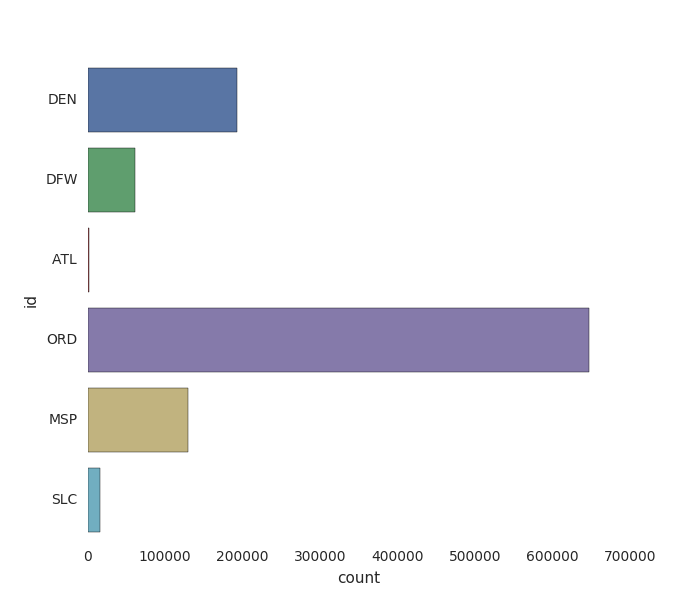

In [22]:
#Number 3
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(7, 6))
sns.countplot(y='id', data=pdlayover)

display(f.figure)

In [23]:
#Number 4
pddelay = filteredPaths.select('v1.id', 'v1.City', 'v1.State', 'e0.delay', 'e1.delay').toPandas()
pddelay["Total_Delay"] = pddelay.delay.sum(axis=1)
totaldelay = pddelay.groupby(['id', 'City', 'State'])['Total_Delay'].sum().sort_values(ascending=False)
totaldelay

Out[ 205 ]: 
id City State
ORD Chicago IL 22985306
DEN Denver CO 6459122
MSP Minneapolis MN 3891636
DFW Dallas TX 1056420
SLC Salt Lake City UT 334429
ATL Atlanta GA 33667
Name: Total_Delay, dtype: int64

In [24]:
#Above and Beyond
DTWdepart = tripGraph.edges.filter("src = 'DTW'").toPandas()
DTWtop10 = DTWdepart.dst.value_counts().nlargest(10)
DTWtop10

Out[ 206 ]: 
ORD 1209
LGA 1185
ATL 1149
CLT 872
MCO 754
MDW 698
MSP 697
PHX 686
BWI 684
DFW 675
Name: dst, dtype: int64

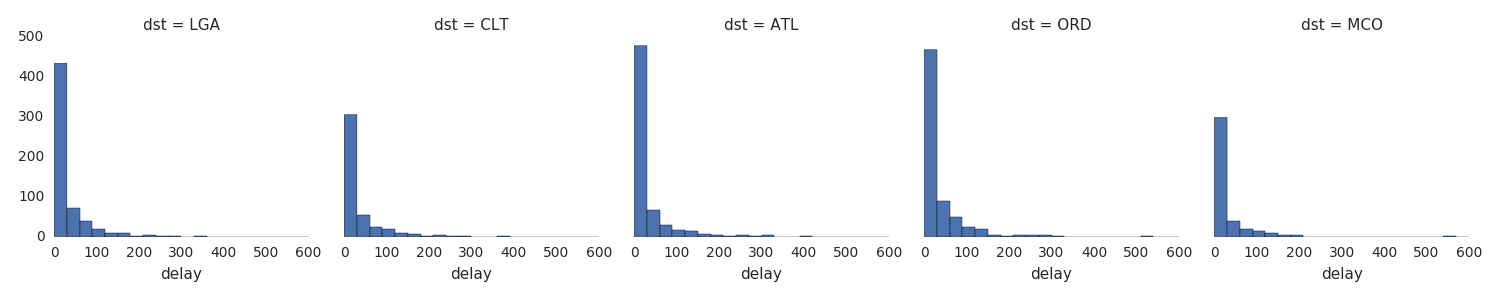

In [25]:
DTWtop5 = DTWdepart[DTWdepart.dst.isin(DTWtop10.index[0:5])]
bins = np.linspace(0, 600, 21)

f, ax = plt.subplots(figsize=(7, 6))
top5 = sns.FacetGrid(DTWtop5, col="dst")
top5 = top5.map(plt.hist, "delay", bins=bins)
display(f.figure)

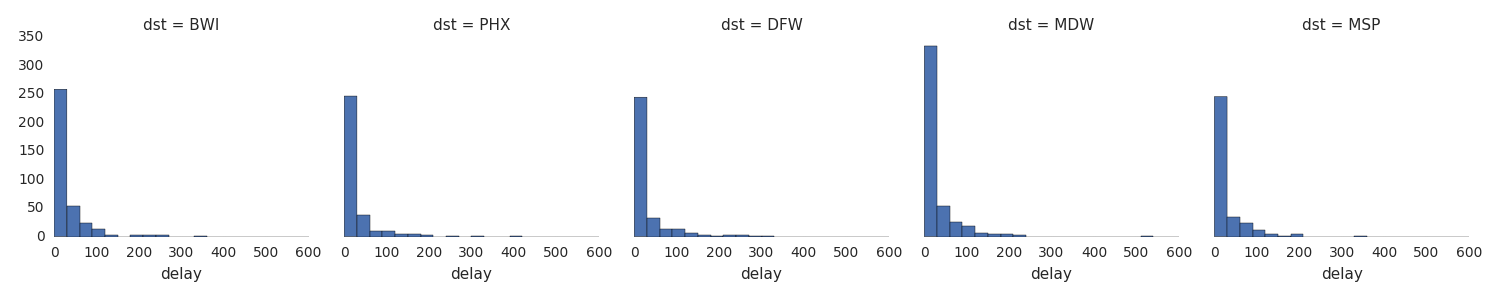

In [26]:
DTWbottom5 = DTWdepart[DTWdepart.dst.isin(DTWtop10.index[5:])]

f, ax = plt.subplots(figsize=(7, 6))
bot5 = sns.FacetGrid(DTWbottom5, col="dst")
bot5 = bot5.map(plt.hist, "delay", bins=bins)
display(f.figure)

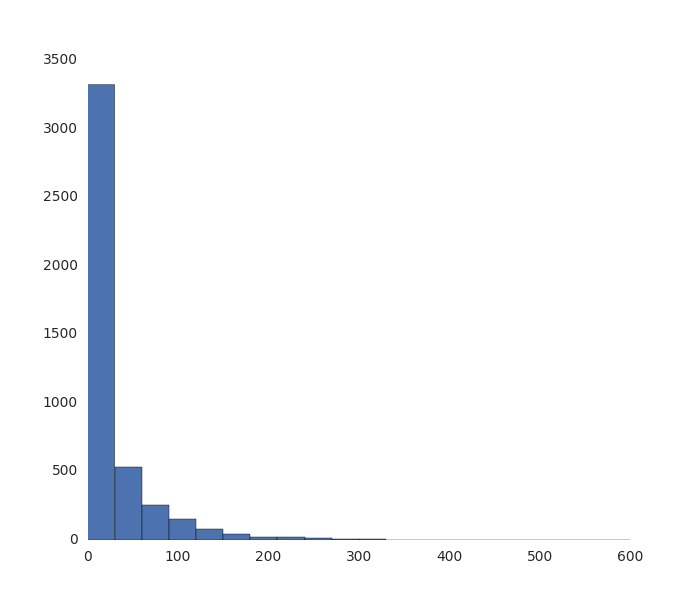

In [27]:
DTWtop = DTWdepart[DTWdepart.dst.isin(DTWtop10.index)]
f, ax = plt.subplots(figsize=(7, 6))
plt.hist(x=DTWtop.delay, bins=bins)
display(f.figure)